# Laser PID Simulation

Below are the scripts I used to simulate how the laser power would react to the rotation mount. Full Python implementation of the rotation mount is on a Red Pitaya in the lab and I will post it here soon.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from simple_pid import PID
import time

In [12]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [13]:
def get_voltage(rotation_mount_angle):
    polarization_angle = rotation_mount_angle * 2
    return np.cos(polarization_angle)**2

In [105]:
Kp, Ki, Kd = 1, 0, 0
update_interval = 3
pid = PID(Kp, Ki, Kd, setpoint=0.2, sample_time=update_interval)
rotation_mount_angle = 0
start_time = time.time()
last_update_time = time.time()
times = []
voltages = []

while time.time() - start_time < 45:
    measured_voltage = get_voltage(rotation_mount_angle)
    control = pid(measured_voltage)
    
    times.append(time.time())
    voltages.append(measured_voltage)
    
    if (time.time() - last_update_time >= update_interval):
        rotation_mount_angle += control
        print("error: %+4f | control: %+4f | mount angle: %+4f | voltage: %+4f" 
              % (pid.setpoint - measured_voltage, 
                 control, 
                 rotation_mount_angle, 
                 get_voltage(rotation_mount_angle)))
        last_update_time = time.time()
    
    

error: -0.800000 | control: -0.800000 | mount angle: -0.800000 | voltage: +0.000853
error: +0.199147 | control: +0.199147 | mount angle: -0.600853 | voltage: +0.130153
error: +0.069847 | control: +0.069847 | mount angle: -0.531006 | voltage: +0.237282
error: -0.037282 | control: -0.037282 | mount angle: -0.568288 | voltage: +0.176991
error: +0.023009 | control: +0.023009 | mount angle: -0.545279 | voltage: +0.213435
error: -0.013435 | control: -0.013435 | mount angle: -0.558714 | voltage: +0.191840
error: +0.008160 | control: +0.008160 | mount angle: -0.550554 | voltage: +0.204854
error: -0.004854 | control: -0.004854 | mount angle: -0.555408 | voltage: +0.197074
error: +0.002926 | control: +0.002926 | mount angle: -0.552482 | voltage: +0.201750
error: -0.001750 | control: -0.001750 | mount angle: -0.554232 | voltage: +0.198948
error: +0.001052 | control: +0.001052 | mount angle: -0.553181 | voltage: +0.200631
error: -0.000631 | control: -0.000631 | mount angle: -0.553811 | voltage: +0

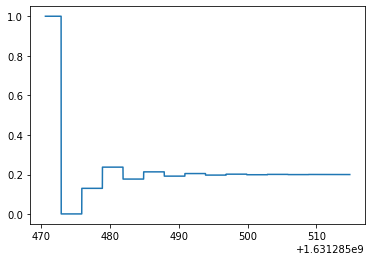

In [106]:
fig, ax = plt.subplots()
ax.plot(times, voltages)
plt.show()